# Índice

[Documentación Spark](https://spark.apache.org/docs/2.1.0/index.html)

- [Etapas DS](#etapas)
- [Caso de estudio](#caso)
- [Carga de datos](#dataset)
- [Inspección inicial](#inspeccion)

    - [Inspección mediante SQL](#inspeccionsql)

- [Análisis exploratorio](#exploratorio)

    - [Valores faltantes](#faltantes)
    - [Transformación y creación de variables](#transformacion)

- [Visualización](#visualizacion)
- [Machine Learning](#ml)

    - [Feature Extraction](#manipulacion)
    
        - [Variables dummy](#dummy)
        - [Variables discretas binarias](#binarias)
        - [Variables discretizadas en buckets](#buckets)
        - [Expansión polinómica](#polinomica)
        - [Normalización de variables](#scaler)
        
    - [Regresión Lineal](#lr)
    - [Regresión Lineal generalizada](#lrg)
    
        - [Selección de variables y regularización](#regularizacion)
        
            - [Ridge Regression](#ridge)
            - [Lasso Regression](#lasso)
            
    - [Regresión Logística (binaria)](#rlog)
    
        - [Confussion Matrix](#cm)
        - [Curva ROC](#roc)
        - [Tuneado de parámetros](#tuneado)
        
    - [Decision Trees](#dt)
    
        - [Regresión](#dtr)
        - [Clasificación](#dtc)
        
    - [Random Forest](#rf)
    
        - [Regresión](#rfr)
        - [Clasificación](#rfc)
        
    - [Multilayer Perceptron Classifier](#perceptron)
    - [Principal Component Analysis](#pca)
        
        - [Sin estandarización](#pca_sin)
        - [Con estandarización](#pca_con)
        
    - [K-means](#kmeans)

    
<div id="idx" />

<div id="etapas" />

## Etapas de un proyecto DS

##### Entender el problema

- Conocimiento del contexto de los datos.
- Información del proceso de recogida y protocolos de medición.
- La mayoría de resultados preliminares del DS se limitan a manifestar lo que el especialista sabe sobre el ámbito de negocio.

##### Analizar la representatividad

- Identificar casuísticas.
- Sesgos de población.
- Muchos métodos de aprendizaje dan por válida la representatividad y concluyen de forma errónea.

##### Explorar el conjunto de datos

- Conjunto de datos: heterogéneos, voluminosos, complejos, dinámicos...
- Primeros pasos: limpieza, imputación...
- Suponer en primera instancia que los datos reflejan una realidad estocástica (y no determinista).

##### Definir objetivos

- ¿Objetivo descrito por una única variable?
- ¿Segmentar o modelar?
- ¿Explicativo o predictivo?

##### Definir hipótesis

- Muchos trabajos fracasan por pretender modelar el promedio de algo cuyo valor promedio no aporta el valor deseado.

##### Escoger técnica o modelo

- No supervisado: objetivo de hallar patrones. SOLUCION = PATRON + INCERTIDUMBRE

- Supervisado: objetivo descrito por una variable. SOLUCION = MODELO + INCERTIDUMBRE

- Los resultados de métodos y técnicas de naturaleza **no supervisada** deben aprovecharse en problemas de naturaleza **supervisada**.

##### Calibrar el modelo

- Hallar los valores de los (meta)parámetros.
- Complejidad computacional: heurísticas, meta-heurísticas, sim-heurísticas...
- Mejoras de la técnica de calibración.
- Combinación de técnicas para escoger un mejor método de calibración.
- Tuneado de parámetros.
- Overfitting.

##### Validar hipótesis

- Post-calibración y comprobación de hipótesis.

##### Medir la incertidumbre

- Training / Test
- Cross Validation
- Validación interna y externa.

##### Mejorar el modelo

- Proximidad o similitud de casos.
- Importancia de las variables.
    - Sin una variables vs todas las variables.
    - Sólo una variable vs todas las variables.
- Crear y transformar variables.
- Estandarizar los datos.
- Añadir información de procesos no supervisados.
- Técnicas de penalización.

##### Comparar y/o seleccionar modelos

- Sobreestimación.
- No representatividad.
- Cuantificar el ajuste de los modelos con valores comparables.
- Agrgación de modelos: respuesta en base a un resumen (promedio, etc)) ponderado por cierta medida de ajuste (AIC, etc) de las diferentes respuestas de cada uno de los modelos.

<div id="caso" />

## Caso de estudio

El dataset con el que trabajaremos está compuesto de información obre todos los vuelos comeriales internos en EE.UU. correspondientes al mes de diciembre de 2016. Los datos reflejan información sobre la salida y llegada de dichos vuelos. En conjunto se dispone de alrededor de 500 mil vuelos y unas 30 variables.

Podemos ver información sobre las variables más relevantes del dataset de estudio [aquí](http://stat-computing.org/dataexpo/2009/the-data.html)

~~~
    Name 	Description
 	Year 	1987-2008
 	Month 	1-12
 	DayofMonth 	1-31
 	DayOfWeek 	1 (Monday) - 7 (Sunday)
 	DepTime 	actual departure time (local, hhmm)
 	CRSDepTime 	scheduled departure time (local, hhmm)
 	ArrTime 	actual arrival time (local, hhmm)
 	CRSArrTime 	scheduled arrival time (local, hhmm)
 	UniqueCarrier 	unique carrier code (1)
 	FlightNum 	flight number
 	TailNum 	plane tail number
 	ActualElapsedTime 	in minutes
 	CRSElapsedTime 	in minutes
 	AirTime 	in minutes
 	ArrDelay 	arrival delay, in minutes
 	DepDelay 	departure delay, in minutes
 	Origin 	origin IATA airport code (2)
 	Dest 	destination IATA airport code
 	Distance 	in miles
 	TaxiIn 	taxi in time, in minutes
 	TaxiOut 	taxi out time in minutes
 	Cancelled 	was the flight cancelled?
 	CancellationCode 	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 	Diverted 	1 = yes, 0 = no
 	CarrierDelay 	in minutes
 	WeatherDelay 	in minutes
 	NASDelay 	in minutes
 	SecurityDelay 	in minutes
 	LateAircraftDelay 	in minutes

~~~
(1) [unique carrier code](http://stat-computing.org/dataexpo/2009/supplemental-data.html)
<br>
(2) [IATA airport code](http://stat-computing.org/dataexpo/2009/supplemental-data.html)

En el siguiente [enlace](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) podemos ver una base de datos mucho más completa que contiene los vuelos desde el año 1987 y desde la cual hemos extraído nuestro caso de estudio.

<div id="dataset" />

## Carga de librerías y dataset

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, SparkSession

from pyspark.sql.functions import col
from pyspark.sql.functions import log

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

sc = SparkContext()
spark = SparkSession(sc)
sqlc = SQLContext(sc)

sc.version

'2.4.5'

In [2]:
data = sqlc.read.format("com.databricks.spark.csv").option("header", "true").load("../data/on_time_performance_2016_12.csv", inferSchema=True)

<div id="inspeccion" />

## Inspección inicial


In [3]:
data.dtypes

[('Year', 'int'),
 ('Quarter', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('FlightDate', 'timestamp'),
 ('UniqueCarrier', 'string'),
 ('AirlineID', 'int'),
 ('Carrier', 'string'),
 ('TailNum', 'string'),
 ('FlightNum', 'int'),
 ('OriginAirportID', 'int'),
 ('OriginAirportSeqID', 'int'),
 ('OriginCityMarketID', 'int'),
 ('Origin', 'string'),
 ('OriginCityName', 'string'),
 ('OriginState', 'string'),
 ('OriginStateFips', 'int'),
 ('OriginStateName', 'string'),
 ('OriginWac', 'int'),
 ('DestAirportID', 'int'),
 ('DestAirportSeqID', 'int'),
 ('DestCityMarketID', 'int'),
 ('Dest', 'string'),
 ('DestCityName', 'string'),
 ('DestState', 'string'),
 ('DestStateFips', 'int'),
 ('DestStateName', 'string'),
 ('DestWac', 'int'),
 ('CRSDepTime', 'int'),
 ('DepTime', 'int'),
 ('DepDelay', 'double'),
 ('DepDelayMinutes', 'double'),
 ('DepDel15', 'double'),
 ('DepartureDelayGroups', 'int'),
 ('DepTimeBlk', 'string'),
 ('TaxiOut', 'double'),
 ('WheelsOff', 'int'),
 ('Whe

Seleccionamos las variables de interés:

In [4]:
bd = data.select("Year","Month","DayofMonth","DayOfWeek","CRSDepTime","UniqueCarrier",
               "TailNum", "ArrDelay","DepDelay","Origin","Dest","Distance","Cancelled", "Diverted",
               "CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay")

In [5]:
# Gestión de datos disponibles

#bd
#bd.dtypes
#bd.columns
#bd.head(3)
#bd.show(3)
#bd.collect()
#bd.select("ArrDelay","DepDelay")
#bd.select(bd.ArrDelay)
#bd.drop("Year","Month")
#bd.describe("ArrDelay") 
#bd.count()
#bd.filter(bd.ArrDelay>120)
#bd.filter(bd.ArrDelay>120).show()
#bd.filter(bd.ArrDelay>120).count()
#bd.withColumn("RetrasoNeto", bd.ArrDelay-bd.DepDelay)
#bd.withColumn("RetrasoNeto", bd.ArrDelay-bd.DepDelay).describe("RetrasoNeto").show()

In [6]:
print("Número de filas: ", bd.count())
print("Número de filas sin columnas vacías: ", bd.dropna().count())
print("Vuelos fuera de hora: ", bd.select("ArrDelay").dropna().count())
print("Vuelos con retraso: ", bd.filter(bd.ArrDelay > 0).count())
print("Cantidad de destinos: ", bd.select("Dest").distinct().count())
print("Códigos vuelo: ", bd.select("UniqueCarrier").distinct().count())

print("Descripción de retrasos: ")
bd.describe("ArrDelay").show()

print("Media de tiempo fuera de hora según código: ")
bd.select("Dest","ArrDelay").groupBy("Dest").mean().show()


Número de filas:  460949
Número de filas sin columnas vacías:  103593
Vuelos fuera de hora:  452229
Vuelos con retraso:  187744
Cantidad de destinos:  297
Códigos vuelo:  12
Descripción de retrasos: 
+-------+-----------------+
|summary|         ArrDelay|
+-------+-----------------+
|  count|           452229|
|   mean|8.664734017499983|
| stddev|49.81367422727683|
|    min|            -73.0|
|    max|           2028.0|
+-------+-----------------+

Media de tiempo fuera de hora según código: 
+----+------------------+
|Dest|     avg(ArrDelay)|
+----+------------------+
| BGM| 35.30909090909091|
| PSE| 9.337209302325581|
| INL| 8.254901960784315|
| MSY| 5.031830985915493|
| PPG|               4.4|
| GEG|13.471534653465346|
| SNA|  8.28191027496382|
| BUR|11.343975283213183|
| GRB|13.459558823529411|
| GTF|0.6065573770491803|
| IDA|13.757062146892656|
| GRR|12.164325842696629|
| PSG| 17.96551724137931|
| EUG| 17.99245283018868|
| PVD| 7.068906115417743|
| MYR| 6.552238805970149|
| GSO| 5

<div id="inspeccionsql" />

### Inspección mediante SQL

[Documentación Spark-SQL](https://spark.apache.org/docs/2.1.0/sql-programming-guide.html)

Si queremos manipular datos mediante SQL es necesario registrar la base de datos como tabla:

In [7]:
sqlc.registerDataFrameAsTable(bd, "bd")

sqlc.sql("select Dest, Origin, count(*) as num \
                from bd \
                group by Dest, Origin \
                order by num desc").show()

+----+------+----+
|Dest|Origin| num|
+----+------+----+
| LAX|   SFO|1324|
| SFO|   LAX|1285|
| JFK|   LAX|1056|
| LAX|   JFK|1056|
| LAX|   LAS| 998|
| LAS|   LAX| 994|
| LAX|   SEA| 807|
| SEA|   LAX| 806|
| ORD|   LGA| 798|
| LGA|   ORD| 790|
| ORD|   LAX| 778|
| MCO|   ATL| 757|
| ATL|   MCO| 751|
| LAX|   ORD| 742|
| OGG|   HNL| 737|
| HNL|   OGG| 737|
| SEA|   SFO| 729|
| ATL|   LGA| 727|
| SFO|   SEA| 727|
| LGA|   ATL| 726|
+----+------+----+
only showing top 20 rows



In [8]:
sqlc.sql("select Dest, avg(ArrDelay) as meanArrDelay , count(*) as num\
                from bd \
                group by Dest\
                order by meanArrDelay DESC" ).show()

+----+------------------+---+
|Dest|      meanArrDelay|num|
+----+------------------+---+
| BTM| 38.65384615384615| 56|
| BGM| 35.30909090909091| 56|
| JAC| 33.95637583892618|310|
| EGE| 32.86590038314176|268|
| TYR| 30.41176470588235| 17|
| HDN|             30.36|157|
| ITH|29.512820512820515| 85|
| SPS|29.029850746268657| 69|
| APN|28.695652173913043| 52|
| GGG|28.333333333333332| 44|
| ASE| 28.30346232179226|566|
| SBN| 26.31782945736434|406|
| MQT| 26.09433962264151| 56|
| ABI| 25.88888888888889| 27|
| FWA|25.273809523809526|350|
| PLN|            24.625| 80|
| SUN|            24.475|132|
| CHA|24.445040214477213|386|
| LCH|         24.078125|133|
| ESC| 23.71153846153846| 53|
+----+------------------+---+
only showing top 20 rows



<div id="exploratorio" />

## Análisis exploratorio

#### Posibles objetivos:

* **Predecir  el retraso de los vuelos.**
* Analizar factores relacionados con los vuelos causantes de retraso.
* Analizar factores relacionados con vuelos con retraso atribuible a la aerolínea.
* Classificar Aeropuertos.
* Classificar Aerolíneas.

#### Exploración de variables *cualitativas*

* Número de casos disponibles.
* Número de categorías.
* Frecuencias relativas.
* Frecuencias absolutas.
* Frecuencia relativa acumulada.
* Frecuencia absoluta acumulada.

#### Exploración de variables *cuantitativas*

* Número de casos disponibles
* Medidas de localización
  * Media: centro de masas
  * Mediana: punto medio (50% de la muestra)
* Medidas de dispersión  
  * Varianza / desviación estándar
  * Cuartiles Q3 y Q1 (25% y 75% de la muestra)
  * Rango Intercuartílico: IQR = Q3 – Q1
  * Rango = max – min
* Valores extremos
  * Máximo y Mínimo;  Top y Bottom
  * Percentiles (1%, 99%)
  * Porcentaje de casos "por encima/debajo de".

In [9]:
#bd2 = bd.filter(bd.Origin.isin("ATL","ORD","DEN","LAX","DFW","SFO","PHX","LAS") & bd.Dest.isin("ATL","ORD","DEN","LAX","DFW","SFO","PHX","LAS"))

bd2 = sqlc.sql("select * from bd \
            where Origin in ("ATL","ORD","DEN","LAX","DFW","SFO","PHX","LAS") \
            and Dest in ("ATL","ORD","DEN","LAX","DFW","SFO","PHX","LAS")")

sqlc.registerDataFrameAsTable(bd2, "bd2")

In [10]:
bd2.describe().show()

+-------+--------------------+-----+------------------+------------------+------------------+-------------+-------+------------------+-----------------+------+-----+-----------------+--------------------+--------------------+-----------------+-----------------+------------------+--------------------+------------------+
|summary|                Year|Month|        DayofMonth|         DayOfWeek|        CRSDepTime|UniqueCarrier|TailNum|          ArrDelay|         DepDelay|Origin| Dest|         Distance|           Cancelled|            Diverted|     CarrierDelay|     WeatherDelay|          NASDelay|       SecurityDelay| LateAircraftDelay|
+-------+--------------------+-----+------------------+------------------+------------------+-------------+-------+------------------+-----------------+------+-----+-----------------+--------------------+--------------------+-----------------+-----------------+------------------+--------------------+------------------+
|  count|               30965|30965| 

Exportamos la tabla a **pandas** para mejorar la visualización:

In [11]:
bd2.describe().toPandas().set_index("summary").transpose()

summary,count,mean,stddev,min,max
Year,30965,2016.0,1.779074192836568E-13,2016,2016
Month,30965,12.0,0.0,12,12
DayofMonth,30965,15.943484579363798,8.876012086360857,1,31
DayOfWeek,30965,4.008719522041014,1.9259616915158777,1,7
CRSDepTime,30965,1336.3809785241401,507.6969342028552,5,2359
UniqueCarrier,30965,None,None,AA,WN
TailNum,30820,None,None,N001AA,N999DN
ArrDelay,30466,13.300695857677411,53.50946738163754,-53.0,2028.0
DepDelay,30501,17.28562997934494,49.93901250742798,-21.0,2040.0
Origin,30965,None,None,ATL,SFO


In [12]:
bd2.describe("ArrDelay").show()

+-------+------------------+
|summary|          ArrDelay|
+-------+------------------+
|  count|             30466|
|   mean|13.300695857677411|
| stddev| 53.50946738163754|
|    min|             -53.0|
|    max|            2028.0|
+-------+------------------+



In [13]:
sqlc.sql("select min(ArrDelay) as min, \
                max(ArrDelay) as max from bd2" ).show()

+-----+------+
|  min|   max|
+-----+------+
|-53.0|2028.0|
+-----+------+



In [14]:
bd2.select("ArrDelay").orderBy("ArrDelay", ascending=False).show(10)

+--------+
|ArrDelay|
+--------+
|  2028.0|
|  1505.0|
|  1006.0|
|   996.0|
|   951.0|
|   920.0|
|   920.0|
|   873.0|
|   872.0|
|   868.0|
+--------+
only showing top 10 rows



In [15]:
n = bd2.select("ArrDelay").count()
P95 = int(n*0.95)
bd2.select("ArrDelay").sort("ArrDelay").collect()[P95]

Row(ArrDelay=103.0)

In [16]:
#bd2.groupBy("Dest").count().show()
sqlc.sql("select Dest, count(*) as num, round(100*count(*)/30965, 2) as percent \
                from bd2 \
                group by Dest").show()

+----+----+-------+
|Dest| num|percent|
+----+----+-------+
| LAS|3726|  12.03|
| DEN|3967|  12.81|
| PHX|3302|  10.66|
| DFW|3275|  10.58|
| SFO|4430|  14.31|
| ATL|3094|   9.99|
| ORD|3829|  12.37|
| LAX|5342|  17.25|
+----+----+-------+



Variable *Distance* en función de los diferentes aeropuertos:

In [17]:
bd2.select("Origin", "Dest", "Distance").groupBy("Origin", "Dest").mean().show()

+------+----+-------------+
|Origin|Dest|avg(Distance)|
+------+----+-------------+
|   LAS| ORD|       1514.0|
|   PHX| DFW|        868.0|
|   LAX| DFW|       1235.0|
|   PHX| ATL|       1587.0|
|   ATL| ORD|        606.0|
|   DFW| ORD|        802.0|
|   DEN| SFO|        967.0|
|   DFW| DEN|        641.0|
|   PHX| ORD|       1440.0|
|   SFO| ORD|       1846.0|
|   ATL| DEN|       1199.0|
|   SFO| DFW|       1464.0|
|   DEN| LAS|        628.0|
|   ATL| SFO|       2139.0|
|   ORD| DEN|        888.0|
|   ATL| LAS|       1747.0|
|   LAS| PHX|        255.0|
|   ATL| PHX|       1587.0|
|   SFO| DEN|        967.0|
|   PHX| LAS|        255.0|
+------+----+-------------+
only showing top 20 rows



In [18]:
sqlc.sql("select Origin, Dest, count(*) as num, mean(Distance) as mean, \
                min(Distance) as min , max(Distance) as max,  \
                max(Distance) - min(Distance) as dif, \
                stddev(Distance) as stdev \
                from bd2 \
                group by Origin, Dest" ).show()

+------+----+---+------+------+------+---+--------------------+
|Origin|Dest|num|  mean|   min|   max|dif|               stdev|
+------+----+---+------+------+------+---+--------------------+
|   LAS| ORD|302|1514.0|1514.0|1514.0|0.0|                 0.0|
|   PHX| DFW|380| 868.0| 868.0| 868.0|0.0|3.274622918160421...|
|   LAX| DFW|531|1235.0|1235.0|1235.0|0.0|                 0.0|
|   PHX| ATL|312|1587.0|1587.0|1587.0|0.0|                 0.0|
|   ATL| ORD|530| 606.0| 606.0| 606.0|0.0|                 0.0|
|   DFW| ORD|578| 802.0| 802.0| 802.0|0.0|                 0.0|
|   DEN| SFO|674| 967.0| 967.0| 967.0|0.0|                 0.0|
|   DFW| DEN|423| 641.0| 641.0| 641.0|0.0|7.761114762939483...|
|   PHX| ORD|439|1440.0|1440.0|1440.0|0.0|                 0.0|
|   SFO| ORD|667|1846.0|1846.0|1846.0|0.0|                 0.0|
|   ATL| DEN|486|1199.0|1199.0|1199.0|0.0|                 0.0|
|   SFO| DFW|403|1464.0|1464.0|1464.0|0.0|                 0.0|
|   DEN| LAS|559| 628.0| 628.0| 628.0|0.

In [19]:
sqlc.sql("select Origin, Dest, count(*) as num, mean(Distance) as mean, \
                min(Distance) as min , max(Distance) as max,  \
                max(Distance) - min(Distance) as dif, \
                stddev(Distance) as stdev \
                from bd2 \
                group by Origin, Dest" ).toPandas()

,Origin,Dest,num,mean,min,max,dif,stdev
0,LAS,ORD,302,1514.0,1514.0,1514.0,0.0,0.000000e+00
1,PHX,DFW,380,868.0,868.0,868.0,0.0,3.274623e-14
2,LAX,DFW,531,1235.0,1235.0,1235.0,0.0,0.000000e+00
3,PHX,ATL,312,1587.0,1587.0,1587.0,0.0,0.000000e+00
4,ATL,ORD,530,606.0,606.0,606.0,0.0,0.000000e+00
5,DFW,ORD,578,802.0,802.0,802.0,0.0,0.000000e+00
6,DEN,SFO,674,967.0,967.0,967.0,0.0,0.000000e+00
7,DFW,DEN,423,641.0,641.0,641.0,0.0,7.761115e-14
8,PHX,ORD,439,1440.0,1440.0,1440.0,0.0,0.000000e+00
9,SFO,ORD,667,1846.0,1846.0,1846.0,0.0,0.000000e+00


<div id="faltantes" />

### Valores faltantes

Podemos ver que algunos de nuestras variables contienen valores nulos:

In [20]:
bd2.describe().toPandas().transpose()[0]

summary              count
Year                 30965
Month                30965
DayofMonth           30965
DayOfWeek            30965
CRSDepTime           30965
UniqueCarrier        30965
TailNum              30820
ArrDelay             30466
DepDelay             30501
Origin               30965
Dest                 30965
Distance             30965
Cancelled            30965
Diverted             30965
CarrierDelay          8401
WeatherDelay          8401
NASDelay              8401
SecurityDelay         8401
LateAircraftDelay     8401
Name: 0, dtype: object

##### Valores faltantes en *ArrDelay*

In [21]:
#from pyspark.sql.functions import col

bd2.describe("Year", "ArrDelay").filter(col("summary") == "count").collect()

[Row(summary='count', Year='30965', ArrDelay='30466')]

La mayoría de *ArrDelay* son valores vacíos:

In [22]:
bd2.select("ArrDelay").count() - bd2.select("ArrDelay").dropna().count()

499

Los valores faltantes en *ArrDelay* son causados por vuelos cancelados o desviados:

In [23]:
bd2.select("Cancelled", "ArrDelay").groupBy().sum().show()

+--------------+-------------+
|sum(Cancelled)|sum(Diverted)|
+--------------+-------------+
|         481.0|         18.0|
+--------------+-------------+



Eliminamos estos vuelos y construimos un nuevo dataset:

In [24]:
bd3 = bd2.filter(bd2.Cancelled == 0).filter(bd2.Diverted == 0)

In [25]:
bd3.describe().toPandas().transpose()[0]

summary              count
Year                 30466
Month                30466
DayofMonth           30466
DayOfWeek            30466
CRSDepTime           30466
UniqueCarrier        30466
TailNum              30466
ArrDelay             30466
DepDelay             30466
Origin               30466
Dest                 30466
Distance             30466
Cancelled            30466
Diverted             30466
CarrierDelay          8401
WeatherDelay          8401
NASDelay              8401
SecurityDelay         8401
LateAircraftDelay     8401
Name: 0, dtype: object

##### Valores faltantes en tipos de *Delay*.

Parece que para valores de *ArrDelay* menores que 15 tenemos valores nulos en otras variables.

In [26]:
bd3.filter(bd3.ArrDelay < 15).select("ArrDelay", "CarrierDelay", "WeatherDelay",
                                  "NASDelay", "SecurityDelay", "LateAircraftDelay").show(2)

bd3.filter(bd3.ArrDelay > 15).select("ArrDelay", "CarrierDelay", "WeatherDelay",
                                  "NASDelay", "SecurityDelay", "LateAircraftDelay").show(2)

+--------+------------+------------+--------+-------------+-----------------+
|ArrDelay|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+--------+------------+------------+--------+-------------+-----------------+
|    -7.0|        null|        null|    null|         null|             null|
|    -3.0|        null|        null|    null|         null|             null|
+--------+------------+------------+--------+-------------+-----------------+
only showing top 2 rows

+--------+------------+------------+--------+-------------+-----------------+
|ArrDelay|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+--------+------------+------------+--------+-------------+-----------------+
|    51.0|         0.0|         0.0|    51.0|          0.0|              0.0|
|    16.0|         0.0|         0.0|    16.0|          0.0|              0.0|
+--------+------------+------------+--------+-------------+-----------------+
only showing top 2 rows



In [27]:
print("Vuelos atrasados en nuevo dataset (sin vuelos cancelados): ")
bd3.filter(bd3.ArrDelay >= 0).select("ArrDelay", "CarrierDelay", "WeatherDelay",
                                  "NASDelay", "SecurityDelay", "LateAircraftDelay").count()

Vuelos atrasados en nuevo dataset (sin vuelos cancelados): 


14686

Rellenamos los valores *null* con ceros:

In [28]:
bd4 = bd3.na.fill({"CarrierDelay": 0, "WeatherDelay": 0, "NASDelay": 0, "SecurityDelay": 0, "LateAircraftDelay": 0})
#bd4 = bd3.na.fill(0)
#bd4 = bd3.na.drop()

In [29]:
bd4.describe().toPandas().transpose()[0]

summary              count
Year                 30466
Month                30466
DayofMonth           30466
DayOfWeek            30466
CRSDepTime           30466
UniqueCarrier        30466
TailNum              30466
ArrDelay             30466
DepDelay             30466
Origin               30466
Dest                 30466
Distance             30466
Cancelled            30466
Diverted             30466
CarrierDelay         30466
WeatherDelay         30466
NASDelay             30466
SecurityDelay        30466
LateAircraftDelay    30466
Name: 0, dtype: object

<div id="transformacion" />

### Transformación y creación de variables

La nueva variable más significativa y que usaremos en algunos de nuestros modelos de machine learning es *Retraso*. Se tratará de una variable binaria sieno 1 si existe un retraso en el vuelo superior a 15 minutos.

In [30]:
#from pyspark.sql.functions import log

bd4 = bd4.withColumn("LogD", log(10.0, "Distance"))
bd4 = bd4.withColumn("Retraso", (bd4.ArrDelay >= 15).cast("int"))
bd4 = bd4.withColumn("RetrasoNeto", bd4.ArrDelay - bd4.DepDelay)
bd4.describe("ArrDelay", "LogD", "Retraso", "RetrasoNeto").show(5)

+-------+------------------+-------------------+-------------------+------------------+
|summary|          ArrDelay|               LogD|            Retraso|       RetrasoNeto|
+-------+------------------+-------------------+-------------------+------------------+
|  count|             30466|              30466|              30466|             30466|
|   mean|13.300695857677411|  2.886007454172149| 0.2757500164117377|-3.919680955819602|
| stddev| 53.50946738163754|0.28179267734674984|0.44689875846318483|15.560721063721331|
|    min|             -53.0| 2.3729120029701067|                  0|             -48.0|
|    max|            2028.0|  3.330210784571528|                  1|             229.0|
+-------+------------------+-------------------+-------------------+------------------+



In [31]:
bd4.describe("ArrDelay", "LogD", "Retraso", "RetrasoNeto").toPandas()

,summary,ArrDelay,LogD,Retraso,RetrasoNeto
0,count,30466,30466,30466,30466
1,mean,13.300695857677411,2.886007454172149,0.2757500164117377,-3.919680955819602
2,stddev,53.50946738163754,0.28179267734674984,0.44689875846318483,15.560721063721331
3,min,-53.0,2.3729120029701067,0,-48.0
4,max,2028.0,3.330210784571528,1,229.0


Definimos una variable *Horario* según el vuelo se efectúe en horario de mañana, medio día, tarde y noche:

In [32]:
sqlc.registerDataFrameAsTable(bd4, "bd4")

bd5 = sqlc.sql("select *, case \
               when CRSDepTime <= 800 then 1 \
               when 800 < CRSDepTime and CRSDepTime <= 1200 then 2 \
               when 1200 < CRSDepTime and CRSDepTime <= 1600 then 3 \
               when 1600 < CRSDepTime and CRSDepTime <= 2100 then 4 \
               else 1 end as Horario \
               from bd4")
sqlc.registerDataFrameAsTable(bd5, "bd5")

In [33]:
bd5.select("Horario").describe().show()

+-------+------------------+
|summary|           Horario|
+-------+------------------+
|  count|             30466|
|   mean| 2.539322523468785|
| stddev|1.1369016091531157|
|    min|                 1|
|    max|                 4|
+-------+------------------+



In [34]:
bd5.select("Horario").groupBy("Horario").count().show()

+-------+-----+
|Horario|count|
+-------+-----+
|      1| 7519|
|      3| 7180|
|      4| 8385|
|      2| 7382|
+-------+-----+



<div id="visualizacion" />

## Visualización

Veamos algunas gráficas a partir de nuestros datos.

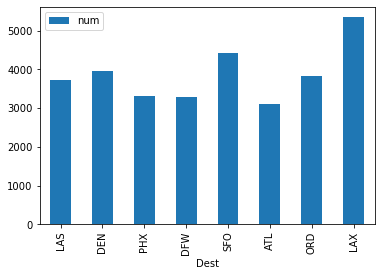

In [35]:
g1 = sqlc.sql("select Dest, count(*) as num from bd2 group by Dest")
df1 = g1.toPandas()
df1.plot(kind="bar", x="Dest", y="num")

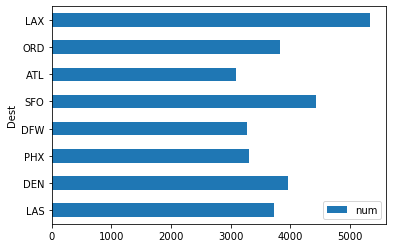

In [36]:
df1.plot(kind="bar", x="Dest", y="num")

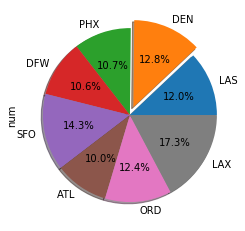

In [37]:
explode = list(np.zeros(8))
explode[1] = 0.1
explode = tuple(explode)

df1.plot.pie(y="num", explode=explode,
             labels=df1["Dest"], autopct="%1.1f%%",
             shadow=True, legend=False)

In [38]:
g2 = sqlc.sql("select Dest, count(*) as num, \
               avg(ArrDelay) as mean, \
               stddev(ArrDelay) as std \
               from bd5 group by Dest")
print("Tabla de resumen numérico: ")
g2.show()

Tabla de resumen numérico: 
+----+----+------------------+------------------+
|Dest| num|              mean|               std|
+----+----+------------------+------------------+
| LAS|3675|14.813877551020408|  46.3175023214435|
| DEN|3889|12.572897917202365| 50.46850865749088|
| PHX|3243|11.315757015109467|43.220567769891666|
| DFW|3248| 6.710591133004926|63.411867733155056|
| SFO|4343| 20.50448998388211|50.348151476304565|
| ATL|3081|3.1830574488802337| 44.70609198877388|
| ORD|3734| 7.260846277450455|63.067425163254285|
| LAX|5253| 22.35275080906149| 56.97652432880392|
+----+----+------------------+------------------+



In [39]:
df2 = g2.toPandas()
print("Tabla de resumen numérico: ")
df2

Tabla de resumen numérico: 


,Dest,num,mean,std
0,LAS,3675,14.813878,46.317502
1,DEN,3889,12.572898,50.468509
2,PHX,3243,11.315757,43.220568
3,DFW,3248,6.710591,63.411868
4,SFO,4343,20.504490,50.348151
5,ATL,3081,3.183057,44.706092
6,ORD,3734,7.260846,63.067425
7,LAX,5253,22.352751,56.976524


Representación gráfica de la información agregada:

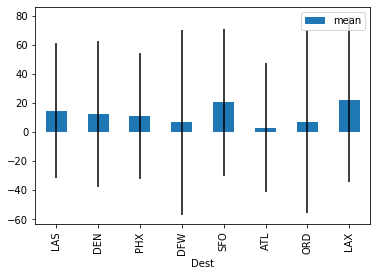

In [40]:
df2.plot(kind="bar", x="Dest", y="mean", yerr="std")

Representación gráfica de una muestra de datos:

In [41]:
df3 = bd5.sample(False, 0.1, 0).select("Dest", "Horario", "ArrDelay", "DepDelay", "RetrasoNeto").toPandas()
df3[1:10]

,Dest,Horario,ArrDelay,DepDelay,RetrasoNeto
1,LAX,4,-20.0,9.0,-29.0
2,LAX,4,30.0,40.0,-10.0
3,LAX,4,-11.0,-5.0,-6.0
4,LAX,4,-4.0,10.0,-14.0
5,LAX,4,7.0,2.0,5.0
6,LAS,2,2.0,-1.0,3.0
7,LAS,2,1.0,4.0,-3.0
8,LAX,4,1.0,22.0,-21.0
9,LAX,4,74.0,90.0,-16.0


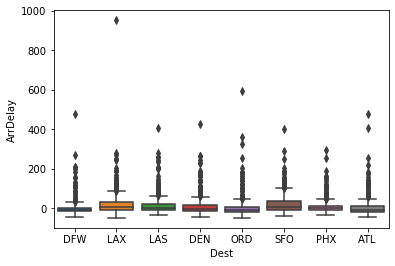

In [42]:
#import seaborn as sb
sb.boxplot(x="Dest", y="ArrDelay", data=df3)

En el siguiente gráfico podemos ver el comportamiento de la variable *ArrDelay* en función del horario:

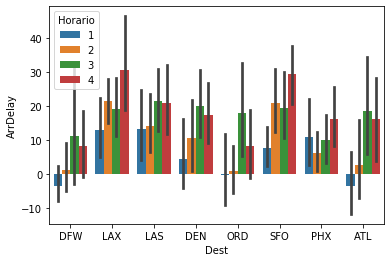

In [43]:
sb.barplot(x="Dest", y="ArrDelay", hue="Horario", data=df3)

Resumen numérico de retrasos:

In [44]:
df4 = sqlc.sql("select Dest, Retraso, count(*) as num \
               from bd5 group by Dest, Retraso \
               order by Dest, Retraso").toPandas()
df4

,Dest,Retraso,num
0,ATL,0,2527
1,ATL,1,554
2,DEN,0,2885
3,DEN,1,1004
4,DFW,0,2647
5,DFW,1,601
6,LAS,0,2620
7,LAS,1,1055
8,LAX,0,3229
9,LAX,1,2024


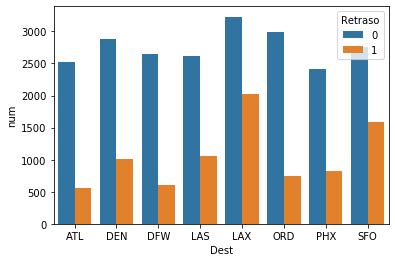

In [45]:
sb.barplot(x="Dest", y="num", hue="Retraso", data=df4)

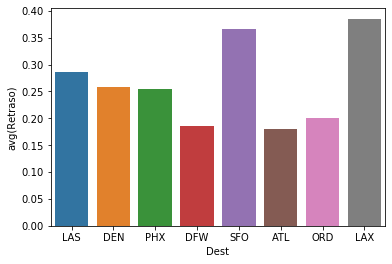

In [46]:
df5 = bd5.groupBy("Dest").mean("Retraso").toPandas()
sb.barplot(x="Dest", y="avg(Retraso)", data=df5)

En función del día de la semana podemos ver el número de retrasos para cada destino:

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


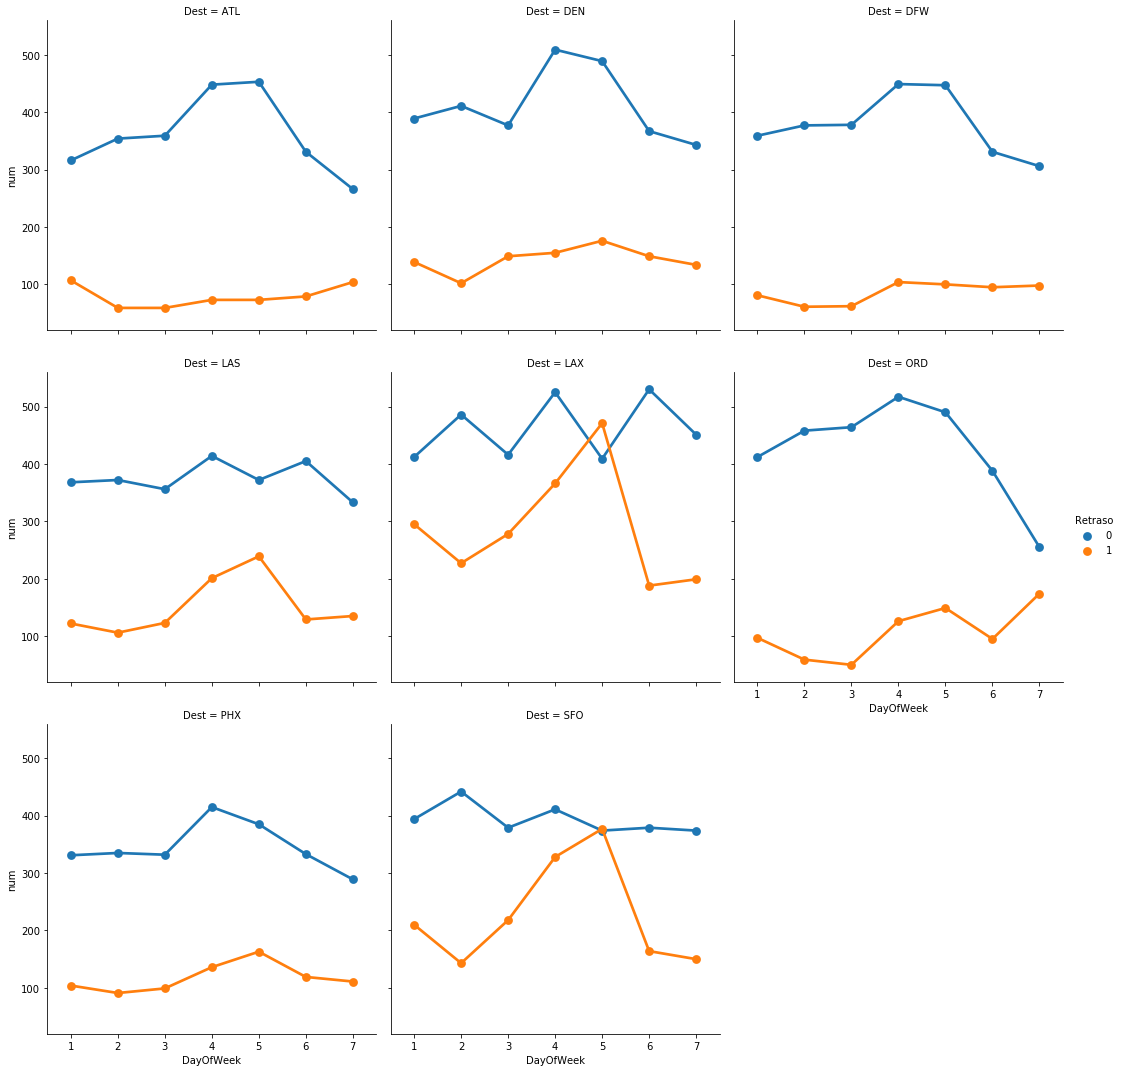

In [47]:
df6 = sqlc.sql("select DayOfWeek, Dest, Retraso, count(*) as num \
               from bd5 group by DayOfWeek, Dest, Retraso \
               order by DayOfWeek, Dest, Retraso").toPandas()

sb.factorplot(x="DayOfWeek", y="num", col="Dest", hue="Retraso", data=df6, col_wrap=3,)

Veamos ahora la relación entre los atrasos según la salida y llegada a los aeropuertos:

In [48]:
df3.corr()

,Horario,ArrDelay,DepDelay,RetrasoNeto
Horario,1.000000,0.119875,0.109980,0.061252
ArrDelay,0.119875,1.000000,0.958098,0.379691
DepDelay,0.109980,0.958098,1.000000,0.098792
RetrasoNeto,0.061252,0.379691,0.098792,1.000000


In [49]:
bd5.corr(ArrDelay", "DepDelay")

0.9571345646224717

In [50]:
bd5.corr("RetrasoNeto", "DepDelay")

0.08921162142633976

Podemos ver la relación entre algunas variables de manera gráfica:

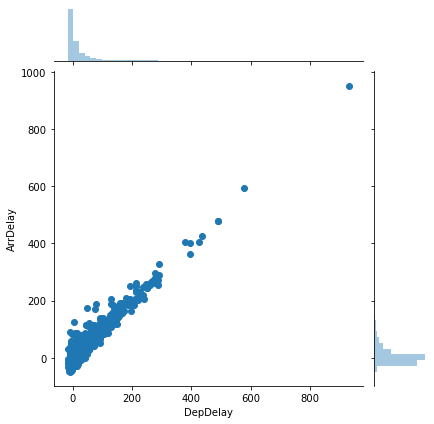

In [51]:
sb.jointplot(x="DepDelay", y="ArrDelay", data=df3)

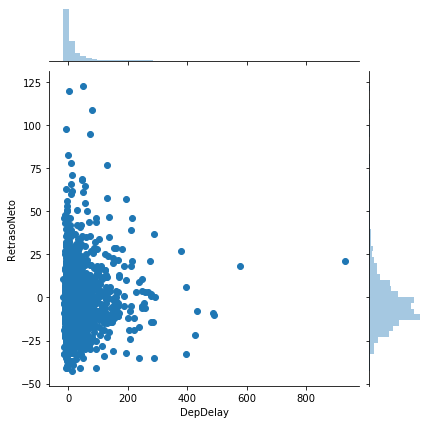

In [52]:
sb.jointplot(x="DepDelay", y="RetrasoNeto", data=df3)

<div id="ml" />

## Machine Learninig

[Documentación Sparkml](https://spark.apache.org/docs/2.1.0/ml-guide.html)

<div id="manipulacion" />

### Manipulación de variables (Feature Extraction)

[Extracción, transformación y selección de caracteríticas (features)](https://spark.apache.org/docs/2.1.0/ml-features.html)

<div id="dummy" />

#### Variables "dummy"

Creamos variable "dummy" a partir de variable *Horario*:

In [53]:
dummy = bd5.withColumn("Horario1", (bd5.Horario == 1)).withColumn("Horario2", (bd5.Horario == 2)).withColumn("Horario3", (bd5.Horario == 3))
dummy.select("Horario", "Horario1", "Horario2", "Horario3").toPandas().head(3)

,Horario,Horario1,Horario2,Horario3
0,2,False,True,False
1,2,False,True,False
2,2,False,True,False


<div id="binarias" />

#### Variables discretas binarias

Creamos variable binaria cuyo valor será 0 o 1 a partir de la variable *DepDelay*, siendo 15 el valor de corte:

In [54]:
from pyspark.ml.feature import Binarizer

binarizer = Binarizer(threshold=15.0, inputCol="DepDelay", outputCol="SalidaBin")
binarizer.transform(bd5).select("DepDelay", "SalidaBin").distinct().show(6)
binarizer.transform(bd5).select("SalidaBin").distinct().show()

+--------+---------+
|DepDelay|SalidaBin|
+--------+---------+
|    98.0|      1.0|
|    38.0|      1.0|
|   -15.0|      0.0|
|   304.0|      1.0|
|   108.0|      1.0|
|     2.0|      0.0|
+--------+---------+
only showing top 6 rows

+---------+
|SalidaBin|
+---------+
|      0.0|
|      1.0|
+---------+



<div id="buckets" />

#### Variables discretizadas en buckets

Creamos un "bucket" con tres valores posibles a partir de la variable *DepDelay*:

In [55]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[-float("inf"), 0.0, 15.0, float("inf")],
                        inputCol="DepDelay", outputCol="SalidaBin")

bucketizer.transform(bd5).select("SalidaCat").distinct().show()

+---------+
|SalidaCat|
+---------+
|      0.0|
|      1.0|
|      2.0|
+---------+



Pyspark incluye otras transformaciones, por ejemplo *QuantileDiscretizer* que se pueden consultar en la [documentación oficial](https://spark.apache.org/docs/2.1.0/ml-features.html).

<div id="polinomica" />

#### Expansión polinómica de variables

 Consiste en expandir las variables en un espacio polinómico, el cual será una combinación n-dimensional de las variables originales. La expansión puede ser en términos cuadráticos, productos, etc)

In [56]:
from pyspark.ml.feature import VectorAssembler as VA
from pyspark.ml.feature import PolynomialExpansion

assembler = VA(inputCols=["DepDelay", "Distance"],
               outputCol="features")

px = PolynomialExpansion(degree=2,
                         inputCol="features",
                         outputCol="Polyn")

bd51 = px.transform(assembler.transform(bd5))

bd51.select("DepDelay", "Distance", "Polyn").head(5)

[Row(DepDelay=-5.0, Distance=1235.0, Polyn=DenseVector([-5.0, 25.0, 1235.0, -6175.0, 1525225.0])),
 Row(DepDelay=5.0, Distance=1235.0, Polyn=DenseVector([5.0, 25.0, 1235.0, 6175.0, 1525225.0])),
 Row(DepDelay=-3.0, Distance=1235.0, Polyn=DenseVector([-3.0, 9.0, 1235.0, -3705.0, 1525225.0])),
 Row(DepDelay=-7.0, Distance=1235.0, Polyn=DenseVector([-7.0, 49.0, 1235.0, -8645.0, 1525225.0])),
 Row(DepDelay=-6.0, Distance=1235.0, Polyn=DenseVector([-6.0, 36.0, 1235.0, -7410.0, 1525225.0]))]

Donde nuestro vector *Polyn* está compuesto por los valores de nuestros vectores de entrada, su producto y su valor al cuadrado.

<div id="scaler" />

#### Normalización de variables

La normalización o estandarización garantiza que variables con valores situados muy en los extremos no tengan un peso excesivo en la función objetivo. En principio se desea que la media sea cero y la desviación estándar sea 1.

In [57]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="stdfeatures",
                        withStd=True, withMean=True)
scaler_model = scaler.fit(bd51)
bd51std = scaler_model.transform(bd51)

bd51std.select("features", "stdfeatures").show()

+-------------+--------------------+
|     features|         stdfeatures|
+-------------+--------------------+
|[-5.0,1235.0]|[-0.4459454808573...|
| [5.0,1235.0]|[-0.2452533483159...|
|[-3.0,1235.0]|[-0.4058070543490...|
|[-7.0,1235.0]|[-0.4860839073656...|
|[-6.0,1235.0]|[-0.4660146941114...|
|[-1.0,1235.0]|[-0.3656686278407...|
| [0.0,1235.0]|[-0.3455994145866...|
| [0.0,1235.0]|[-0.3455994145866...|
|[-1.0,1235.0]|[-0.3656686278407...|
|[-1.0,1235.0]|[-0.3656686278407...|
| [1.0,1235.0]|[-0.3255302013325...|
|[-2.0,1235.0]|[-0.3857378410949...|
|[-4.0,1235.0]|[-0.4258762676032...|
|[-1.0,1235.0]|[-0.3656686278407...|
| [0.0,1235.0]|[-0.3455994145866...|
| [0.0,1235.0]|[-0.3455994145866...|
|[13.0,1235.0]|[-0.0846996422828...|
|[17.0,1235.0]|[-0.0044227892663...|
|[12.0,1235.0]|[-0.1047688555370...|
|[19.0,1235.0]|[0.03571563724193...|
+-------------+--------------------+
only showing top 20 rows



A pesar de las funciones implementadas por pyspark, siempre podremos hacer una transformación manual de los datos:

In [58]:
# Transformación manual de ejemplo a partir del dataset de expansión polinómica

manual = bd.withColumn("DepDelay2", (bd51.DepDelay**2)).withColumn("DepD_Distance", (bd51.DepDelay * bd51.Distance))

<div id="lr" />

### Regresión lineal

[Documentación Linear Regression](https://spark.apache.org/docs/2.1.0/ml-classification-regression.html#linear-regression)

A partir del dataset *bd5* hemos visto que las variables *ArrDelay* y *DepDelay* se relacionan entre sí de forma lineal.

**Modelo Teórico:**

$Y_i = \beta_0 + \beta_1 X_{1}$
<br>
ArrDelay $=\beta_0 + \beta_1$DepDelay

In [59]:
#from pyspark.ml.feature import VectorAssembler as VA
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
#from pyspark.sql.functions import col

# Creamos un VectorAssembler (vector de características)

assembler = VA(inputCols=["DepDelay"], outputCol="features")
bd6 = assembler.transform(bd5).select(col("ArrDelay").alias("label"), "features")
#bd6.show(3)

# Creamos conjunto entrenamiento y test.

splits = bd6.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

# Definimos los algoritmos de regresión indicando la columna target=eruptions.
# Aplicamos el modelo sobre el conjunto de entrenamiento.

lr = LinearRegression(maxIter=5, regParam=0.0, solver="normal", labelCol="label", featuresCol="features")
lr_model = lr.fit(train)

predict_train = lr_model.transform(train)
predict_test = lr_model.transform(test)
predict_test.show(5)

# Obtenemos algunos parámetros del modelo.

print("Intercept: {0}".format(lr_model.intercept))
print("Coefficients: {0}".format(lr_model.coefficients))
print(" ")

# Usamos un evaluador para conocer el error de entrenamiento y test.

ev = RegressionEvaluator(labelCol = "label")
print("RMSE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "rmse"})))
print("MAE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "mae"})))
print("R2 test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "r2"})))

trainingSummary = lr_model.summary
print("R2 training: %f" % trainingSummary.r2)

#print(RegressionEvaluator(metricName="rmse").evaluate(predict_train))
#print(RegressionEvaluator(metricName="r2").evaluate(predict_train))
#print(RegressionEvaluator(metricName="mae").evaluate(predict_train))

+-----+--------+-------------------+
|label|features|         prediction|
+-----+--------+-------------------+
|-53.0|  [-8.0]|-12.702316577102028|
|-49.0|  [-4.0]| -8.589660127045981|
|-48.0|  [-7.0]|-11.674152464588015|
|-42.0|  [-3.0]|  -7.56149601453197|
|-38.0|  [-8.0]|-12.702316577102028|
+-----+--------+-------------------+
only showing top 5 rows

Intercept: -4.477003676989936
Coefficients: [1.0281641125140115]
 
RMSE test: 15.404711237704518
MAE test: 10.752212057508162
R2 test: 0.9098912259868307
R2 training: 0.918469


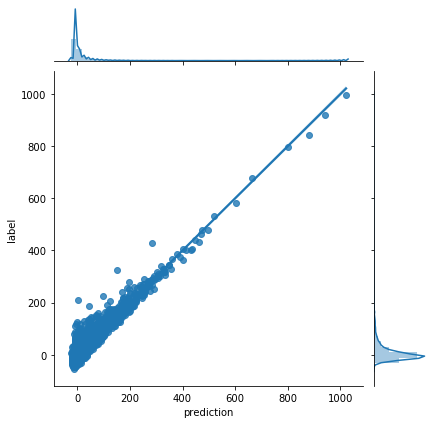

In [60]:
pdpred = predict_test.toPandas()
sb.jointplot(x="prediction", y="label", data=pdpred, kind="reg")

<div id="lrg" />

### Regresión lineal generalizada

Usaremos el mismo método del punto anterior pero esta vez sobre un dataset con varias variables.

**Modelo Teórico:**

$Y_i = \beta_0 + \beta_1 X_{1} + ... \beta_p X_{p}$

In [61]:
# Construimos nuevo dataset bd5 a partir del dataset dummy y una transformación "manual" de variables

bd5 = dummy.withColumn("DepDelay2", (dummy.DepDelay**2)).withColumn("DepD_Distance", (dummy.DepDelay * dummy.Distance))
bd5.columns

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'UniqueCarrier',
 'TailNum',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'Cancelled',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'LogD',
 'Retraso',
 'RetrasoNeto',
 'Horario',
 'Horario1',
 'Horario2',
 'Horario3',
 'DepDelay2',
 'DepD_Distance']

Veamos como se relacionan algunas de las variables:

In [62]:
pdf5 = bd5.sample(False, 0.1, 0).select("ArrDelay", "DepDelay", "DayOfWeek", "CRSDepTime", "Retraso", "DepDelay2", "DepD_Distance").toPandas()
pdf5.corr()

,ArrDelay,DepDelay,DayOfWeek,CRSDepTime,Retraso,DepDelay2,DepD_Distance
ArrDelay,1.000000,0.958098,0.060976,0.135245,0.651387,0.726085,0.820244
DepDelay,0.958098,1.000000,0.062613,0.132016,0.570681,0.764839,0.867182
DayOfWeek,0.060976,0.062613,1.000000,-0.018397,0.017620,0.035459,0.050611
CRSDepTime,0.135245,0.132016,-0.018397,1.000000,0.142320,0.048386,0.090008
Retraso,0.651387,0.570681,0.017620,0.142320,1.000000,0.202895,0.426554
DepDelay2,0.726085,0.764839,0.035459,0.048386,0.202895,1.000000,0.807317
DepD_Distance,0.820244,0.867182,0.050611,0.090008,0.426554,0.807317,1.000000


Ahora entrenaremos un modelo de regresión lineal:

In [63]:
#from pyspark.ml.feature import VectorAssembler
#from pyspark.sql.functions import col
#from pyspark.ml.regression import LinearRegression

# Baseremos nuestro modelo de acuerdo a las siguientes variables

a1 = VA(inputCols=["DepDelay", "Distance", "DayOfWeek", 
                   "CRSDepTime", "Horario1", "Horario2", 
                   "Horario3", "DepDelay2", "DepD_Distance"],
        outputCol="features")

bd6 = a1.transform(bd5).select(col("ArrDelay").alias("label"), "features")
#bd6.show(3)

splits = bd6.randomSplit([0.7, 0.3], 8557)
train = splits[0]
test = splits[1]

lr = LinearRegression(maxIter=5, regParam=0.0, solver="normal", labelCol="label", featuresCol="features")
lr_model = lr.fit(train)

predict_train = lr_model.transform(train)
predict_test = lr_model.transform(test)
#predict_test.show(3)

print("Intercept: {0}".format(lr_model.intercept))
print("Coefficients: {0}".format(lr_model.coefficients))
print(" ")

ev = RegressionEvaluator(labelCol = "label")
print("RMSE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "rmse"})))
print("MAE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "mae"})))
print("R2 test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "r2"})))

trainingSummary = lr_model.summary
print("R2 training: %f" % trainingSummary.r2)

Intercept: -4.58593197411666
Coefficients: [1.058901192293857,-0.0027942886404939437,0.1353545617326008,0.0014577574612006884,-0.3699415183823557,1.2926438703537513,-0.14448431954187826,-1.4205638849480756e-05,-2.4059953721582202e-05]
 
RMSE test: 15.245728436982661
MAE test: 10.69176455845243
R2 test: 0.9151017108987907
R2 training: 0.918879


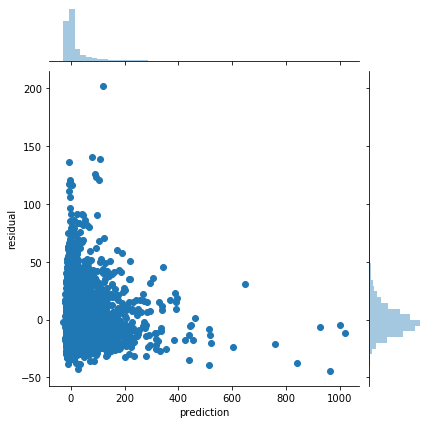

In [64]:
pred = predict_test.withColumn("residual", predict_test.label - predict_test.prediction)

pdpred = pred.toPandas()
sb.jointplot(x="prediction", y="residual", data=pdpred)

A partir de aquí, un paso que puede ser interesante, sobre todo, cuando el conjunto de variables explicativas es muy elevado y existen muchas variables cuyo sentido no queda claro del todo, es filtrar aquellos coeficientes para eliminar aquellas variables del modelo que no contribuyen especialmente a la predicción de los casos. Tendría sentido eliminar coeficientes de magnitud relativamente pequeña.

No obstante, los coeficientes también tienen relación con la magnitud de la variable explicativa en cuestión: variables expresadas en magnitudes elevadas normalmente conllevarán coeficientes pequeños y viceversa. Por lo tanto, necesitamos alguna herramienta que sepa distinguir cuando coeficientes de cierta magnitud no contribuyen especialmente a la predicción. 

Para ello, se aplican técnicas de regularización con el objetivo de seleccionar las variables de interés.

<div id="regularizacion" />

#### Selección de variables y regularización

Esta estrategia se basa en obtener la función de interés
penalizando según su complejidad. Ya que se trata de un modelo de regresión, la complejidad solo se puede obtener a partir de los coeficientes del modelo. 

La función a optimizar es la siguiente:

$\sum{V(Y_i,f(X_i))} +\lambda C(f)$

La complejidad del modelo se va a obtener a partir de una transformación de una función que pondere el peso de todos estos coeficientes. En regresión lineal se desarrolla tal que:

$\sum{(Y_i - f(X_i))^2} +\lambda \sum{\beta^\alpha}$

Siendo el parámetro $\lambda$ el que va a penalizar el criterio de maximización. Cuando $\lambda=0$ no hay penalización y se aplica el modelo de regresión estándar. La penalización en norma L2 se llama penalización Ridge o regresión Ridge, la penalización en norma L1 se llama regresión Lasso.

- **Ordinary Least Squares (OLS)** (ninguna regularización): `regParam = 0`
    
- **L2 (ridge regression)**: `elasticNetParam = 0, regParam > 0`

- **L1 (lasso)**: `elasticNetParam = 1, regParam > 0`

- **L2+L1 (elastic net)**: `0 < elasticNetParam < 1, regParam > 0`

El parámetro `regParam` es arbitrario y tendríamos que analizar propuestas para encontrar el más óptimo.

Lasso se corresponde con una penalización en valor absoluto, mientras que Ridge se corresponde con una penalización en términos cuadráticos de los coeficientes.

Veamos unos ejemplos de regularización y comparemos con nuestro modelo anterior.

<div id="ridge" />

##### Ridge Regression

In [65]:
lr = LinearRegression(maxIter=5, regParam=5.0, elasticNetParam=0.0, solver="normal", labelCol="label", featuresCol="features")
lr_model = lr.fit(train)

predict_train = lr_model.transform(train)
predict_test = lr_model.transform(test)
#predict_test.show(3)

print("Intercept: {0}".format(lr_model.intercept))
print("Coefficients: {0}".format(lr_model.coefficients))
print(" ")

ev = RegressionEvaluator(labelCol="label")
print("RMSE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "rmse"})))
print("MAE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "mae"})))
print("R2 test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "r2"})))

trainingSummary = lr_model.summary
print("R2 training: %f" % trainingSummary.r2)

Intercept: -1.7209018610029796
Coefficients: [0.7875398888352265,-0.0052980192691535815,0.24366810346305534,0.0023879126258369875,-1.146780690462629,0.8538081104201649,-0.1689963353576372,5.609588535428105e-05,0.0001383731086805366]
 
RMSE test: 16.303241079892214
MAE test: 11.484935309295937
R2 test: 0.9029153699224923
R2 training: 0.904506


La penalización ha provocado un menor ajuste. Esto es natural puesto que estamos encogiendo la magnitud de los coeficientes para satisfacer la propuesta de modelización. 

Vemos así algunos coeficientes que prácticamente son 0 y el término R2 es sensiblemente menor. 

<div id="lasso" />

##### Lasso Regression

In [66]:
lr = LinearRegression(maxIter=5, regParam=5, elasticNetParam=1.0, solver="normal", labelCol="label", featuresCol="features")
lr_model = lr.fit(train)

predict_train = lr_model.transform(train)
predict_test = lr_model.transform(test)
#predict_test.show(3)

print("Intercept: {0}".format(lr_model.intercept))
print("Coefficients: {0}".format(lr_model.coefficients))
print(" ")

ev = RegressionEvaluator(labelCol="label")
print("RMSE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "rmse"})))
print("MAE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "mae"})))
print("R2 test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "r2"})))

trainingSummary = lr_model.summary
print("R2 training: %f" % trainingSummary.r2)

Intercept: -2.1850292998620024
Coefficients: [0.8683895520579525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.49941879183081e-05]
 
RMSE test: 16.57068808543913
MAE test: 11.600896514501981
R2 test: 0.8997039881822201
R2 training: 0.902058


Algunos de los coeficientes han sido transformados a 0. En este caso sí desaparecen del modelo algunas variables.

##### ¿La estandaricación de las variables es necesaria?

Puesto que la regularización se aplica a los coeficientes, esto genera alguna duda. Genera la duda sobre si la regularización que se aplica a los coeficientes y la magnitud en la que se han medido las variables, puesto que determina también la magnitud de los coeficientes, puede tener algún tipo de efecto.

La pregunta es qué pasa si las variables introducidas en el modelo son estandarizadas. Tenemos una opción en la definición del modelo donde, por defecto, está activada el valor True: la estrategia de regularización se basará siempre en los coeficientes de las variables estandarizadas de forma que las magnitudes en las que se miden las variables no va a afectar el resultado.

Podemos comprobarlo simplemente modificando este valor a **False**:

In [67]:
lr = LinearRegression(maxIter=5,
                      regParam=5,
                      elasticNetParam=1.0,
                      solver="normal",
                      standardization=False,
                      labelCol="label",
                      featuresCol="features")
lr_model = lr.fit(train)

predict_train = lr_model.transform(train)
predict_test = lr_model.transform(test)
#predict_test.show(3)

print("Intercept: {0}".format(lr_model.intercept))
print("Coefficients: {0}".format(lr_model.coefficients))
print(" ")

ev = RegressionEvaluator(labelCol="label")
print("RMSE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "rmse"})))
print("MAE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "mae"})))
print("R2 test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "r2"})))

trainingSummary = lr_model.summary
print("R2 training: %f" % trainingSummary.r2)

Intercept: -0.12661689248616387
Coefficients: [0.8732716821567875,-0.007830170064533288,0.0,0.0031773586744864918,0.0,0.0,0.0,-7.5704711452818e-05,0.0001040158058753625]
 
RMSE test: 16.065368462905937
MAE test: 11.304993714503995
R2 test: 0.9057277309646932
R2 training: 0.906826


Los coeficientes son regularizados sin ningún tipo de estandarización y podemos comprobar cómo el resultado es sensiblemente diferente.

En definitiva, estandarizar las variables nos ayuda a escalar los coeficientes del modelo a magnitudes comparables. Sin la estandarización la penalización se basa en los coeficientes brutos.

<div id="rlog" />

### Regresión logística (binaria)

La regresión logística es el modelo más empleado en estadística para intentar explicar variables que son binarias a diferencia del modelo de regresión lineal que pretende explicar variables de naturaleza puramente cuantitativa.

Los valores predichos se obtinen de

$p_i = \frac{e^{X_i\beta}}{1+e^{X_i\beta}}$

Siendo $X_i\beta  = \beta_0 + \beta_1 X_{1i} + ... \beta_p X_{pi}$ los valores de *rawPrediction* obtenidos tras entrenar el modelo.

A continuación basaremos nuestro análisis en el estudio de la variable binaria de interés *Retraso*, la cual tiene valores 0 o 1:

In [68]:
bd5.select("Retraso").distinct().show()

+-------+
|Retraso|
+-------+
|      1|
|      0|
+-------+



Podemos calcular las correlaciones e intentar medir qué tipo de asociación existe entre esta variable y el resto:

In [69]:
#pdf5.corr()
pdf5.corr()["Retraso"]

ArrDelay         0.651387
DepDelay         0.570681
DayOfWeek        0.017620
CRSDepTime       0.142320
Retraso          1.000000
DepDelay2        0.202895
DepD_Distance    0.426554
Name: Retraso, dtype: float64

También podemos representar en términos gráficos la relación entre nuestra variable de interés y otras variables, por ejemplo, el retraso en la salida. Podemos ver cómo, cuando se produce retraso en la llegada, efectivamente hay un gran retraso en la salida, mientras que si no se produce retraso en la llagada, raras veces se produce un retraso en la salida:

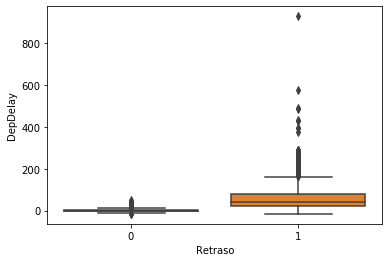

In [70]:
sb.boxplot(x="Retraso", y="DepDelay", data=pdf5)

In [71]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

"""
a1 = VA(inputCols=["DepDelay", "Distance", "DayOfWeek", 
                   "CRSDepTime", "Horario1", "Horario2", 
                   "Horario3", "DepDelay2", "DepD_Distance"],
        outputCol="features")
"""
bd6 = a1.transform(bd5).select(col("Retraso").alias("label"), "features")

# Al modificar bd6 también debemos actualizar nuestros datos de entrenamiento y test

splits = bd6.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

logr = LogisticRegression(maxIter=10, labelCol="label", featuresCol="features", threshold=0.5)                  
logr_model = logr.fit(bd6)

predict_train = logr_model.transform(train)
predict_test = logr_model.transform(test)
#predict_test.show(3)

print("Intercept: {0}".format(logr_model.intercept))
print("Coefficients: {0}".format(logr_model.coefficients))
print(" ")

ev = BCE(rawPredictionCol="rawPrediction", labelCol="label")
print("areaUnderROC test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "areaUnderROC"})))
print("areaUnderROC training: {0}".format(ev.evaluate(predict_train, {ev.metricName: "areaUnderROC"})))


Intercept: -1.3450531370092904
Coefficients: [0.08284955214456273,-0.0007888438911716956,-0.030571612581089133,-0.0001693606600094812,-0.23422732556266226,-0.06621206204052073,-0.1721927046181513,2.188932709797137e-05,4.6186204973628255e-05]
 
areaUnderROC test: 0.9055385631395803
areaUnderROC training: 0.9139355503796955


Los valores de *rawPrediction* se obtienen a partir de los coeficientes del modelo y las correspondientes variables explicativas.

Los valores de *probability* son transformados a *prediction* empleando un punto de corte (`threshold`) que es un parámetro de `LogisticRegression` y que por defecto es 0.5. Variando este parámetro podemos conseguir mejores resultados del modelo.

In [72]:
predict_test.select("label", "prediction", "rawPrediction", "probability").show(5)

+-----+----------+--------------------+--------------------+
|label|prediction|       rawPrediction|         probability|
+-----+----------+--------------------+--------------------+
|    0|       0.0|[1.86918150582410...|[0.86636354246195...|
|    0|       0.0|[1.95641029952650...|[0.87614393912271...|
|    0|       0.0|[1.96352344724690...|[0.87691376462451...|
|    0|       0.0|[2.06584131546371...|[0.88753853549623...|
|    0|       0.0|[2.32881929515337...|[0.91123588173431...|
+-----+----------+--------------------+--------------------+
only showing top 5 rows



In [73]:
predict_test.describe().show()

+-------+------------------+-------------------+
|summary|             label|         prediction|
+-------+------------------+-------------------+
|  count|              9134|               9134|
|   mean| 0.281585285745566|0.23177140354718634|
| stddev|0.4497968013386877|0.42198686668719587|
|    min|                 0|                0.0|
|    max|                 1|                1.0|
+-------+------------------+-------------------+



A este modelo de regresión logística le podemos aplicar las técnicas de normalización **Ridge** o **Lasso** vistas en el apartedo anterior. Esto nos permite seleccionar variables o despreciar algunas que no son de interés o que no contribuyen en exceso a la predicción.

<div id="cm" />

#### Matriz de confusión (Confussion Matrix)

Las predicciones siendo binarias se pueden comparar con los valores originales a través de lo que se llama la matriz de confusión. Este método consiste en generar una serie de [índices](https://es.wikipedia.org/wiki/Sensibilidad_y_especificidad_(estad%C3%ADstica)) que permiten interpretar la capacidad predictiva del modelo:

- Prevalencia: el número de positivos respecto al total.
- Sensibilidad: tasa de acierto cuando la variable respuesta es uno.
- Especificidad: la tasa de acierto cuando la variable respuesta es cero.
- Precision
- Accuracy

In [74]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as MCE

cm = predict_test.groupBy("label", "prediction").count().sort("label", "prediction")
cm.show()

TN = cm.filter((cm.label == 0) & (cm.prediction == 0)).collect()[0][2]
FP = cm.filter((cm.label == 0) & (cm.prediction == 1)).collect()[0][2]
FN = cm.filter((cm.label == 1) & (cm.prediction == 0)).collect()[0][2]
TP = cm.filter((cm.label == 1) & (cm.prediction == 1)).collect()[0][2]

N = TN + FP + TP + FN

prevalencia = (TP + FN) / N
sensibilidad = TP / (TP + FN)
especificidad  = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / N

print("Prevalencia: ", prevalencia)
print("Sensibilidad: ", sensibilidad)
print("Especificidad: ", especificidad)
print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("Accuracy (librería): ", MCE(metricName="weightedRecall").evaluate(predict_test))

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0| 6315|
|    0|       1.0|  247|
|    1|       0.0|  702|
|    1|       1.0| 1870|
+-----+----------+-----+

Prevalencia:  0.281585285745566
Sensibilidad:  0.7270606531881804
Especificidad:  0.9623590368790003
Precision:  0.8833254605573926
Accuracy:  0.896102474271951
Accuracy (librería):  0.896102474271951


Modificando el punto de corte obviamente generaremos tablas de clasificación y matrices de confusión distintas, de hecho, el punto de corte tiene un papel muy importante para llevar a cabo las predicciones del modelo. 

Si bien es verdad que en base a distintos puntos de corte conseguiríamos distintos niveles de accuracy, necesitamos un índice resumen que vaya un poco más allá de los puntos de corte, una especie de índice resumen global. Esto se conseguirá a partir de la curva ROC. 

<div id="roc" />

#### Curva ROC

La [curva ROC](https://es.wikipedia.org/wiki/Curva_ROC) permitirá representar para cualquier punto de corte simultáneamente las sensibilidad y la especificidad conseguida. Este índice es un índice global que no va a depender del punto de corte que se haya especificado en la construcción del modelo. 

Para conseguir este tipo de representación necesitamos capturar las probabilidades de ser positivo en una única columna

+-----+--------------------+--------------------+--------------------+----------+-----------+
|label|            features|       rawPrediction|         probability|prediction|      probs|
+-----+--------------------+--------------------+--------------------+----------+-----------+
|    0|(9,[1,2,3],[236.0...|[1.86918150582410...|[0.86636354246195...|       0.0| 0.13363646|
|    0|(9,[1,2,3],[236.0...|[1.95641029952650...|[0.87614393912271...|       0.0| 0.12385606|
|    0|(9,[1,2,3],[236.0...|[1.96352344724690...|[0.87691376462451...|       0.0| 0.12308624|
|    0|(9,[1,2,3],[370.0...|[2.06584131546371...|[0.88753853549623...|       0.0| 0.11246146|
|    0|(9,[1,2,3],[641.0...|[2.32881929515337...|[0.91123588173431...|       0.0|0.088764116|
|    0|(9,[1,2,3],[651.0...|[2.36389213344599...|[0.91403213245409...|       0.0| 0.08596787|
|    0|(9,[1,2,3],[731.0...|[2.38033876945774...|[0.91531569695764...|       0.0|0.084684305|
|    0|(9,[1,2,3],[731.0...|[2.44241146480059...|[0.92000474

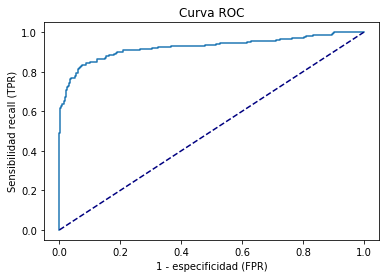

areaUnderROC test: 0.9055385631395803


In [75]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from sklearn.metrics import roc_curve

second_element = udf(lambda v: float(v[1]), FloatType())
pred2 = predict_test.withColumn("probs", second_element("probability"))

pred2.show(10)

# Gráfica

pred2 = pred2.sample(False,0.1).select("label", "probs").toPandas()
fpr, tpr, _ = roc_curve(pred2["label"], pred2["probs"])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("1 - especificidad (FPR)")
plt.ylabel("Sensibilidad recall (TPR)")
plt.title("Curva ROC")
plt.show()

print("areaUnderROC test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "areaUnderROC"})))

<div id="tuneado" />

#### Tuneado Automático de parámetros

El tuneado de parámetros tan solo se referiere a que los metaparámetros de interés pueden ser evaluados considerando una rejilla de posibles valores, es decir, establecemos la combinación de valores que queremos evaluar y el mismo software se encargará de ejecutar el modelo para cada combinación de metaparámetros hasta escoger qué combinación particular es la más eficiente. A partir de aquí, validaríamos y llevaríamos a cabo las tareas habituales para los modelos.

In [76]:
from pyspark.ml.tuning import ParamGridBuilder,TrainValidationSplit
#from pyspark.ml.classification import LogisticRegression
#from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

logr = LogisticRegression(maxIter=10, labelCol="label", featuresCol="features")

paramGrid = ParamGridBuilder().addGrid(logr.regParam, [1, 0.1]).addGrid(logr.elasticNetParam, [0.0, 1.0]).build()
    
tvs = TrainValidationSplit(estimator=logr, estimatorParamMaps=paramGrid,
                           evaluator=BCE(metricName="areaUnderROC"), trainRatio=0.8)   

logr_model = tvs.fit(train)

predict_test = logr_model.transform(test)
#pred.select("features", "label").show()

ev = BCE(rawPredictionCol="rawPrediction", labelCol="label")
print("areaUnderROC test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "areaUnderROC"})))

areaUnderROC test: 0.9131972967028695


<div id="dt" />

### Decision Trees

En primer lugar, cada vez que pensemos en el concepto de [árbol](https://es.wikipedia.org/wiki/Aprendizaje_basado_en_%C3%A1rboles_de_decisi%C3%B3n) tenemos que tener en cuenta que:

- Cada vértice representa una partición de nuestro conjunto de datos. Cuando partimos, estamos partiendo el conjunto de datos.
- Cada nodo terminal representa una componente del modelo.
- La predicción se realiza recorriendo el árbol, convenientemente, hasta llegar a un nodo terminal.

<div id="dtr" />

#### Regresión

Nuestro objetivo será entrenar un modelo de regresión basado en árboles para la variable *ArrDelay*. Primero que nada convertimos la variable *UniqueCarrier* a tipo numérico e incluirla en nuestro dataset:

In [77]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="UniqueCarrier", outputCol="IndexUniqueCarrier") # el índice empieza en el 0!
bd66 = indexer.fit(bd5).transform(bd5)

bd66.groupBy("UniqueCarrier", "IndexUniqueCarrier").count().sort("IndexUniqueCarrier").show()


+-------------+------------------+-----+
|UniqueCarrier|IndexUniqueCarrier|count|
+-------------+------------------+-----+
|           AA|               0.0| 8853|
|           UA|               1.0| 6112|
|           WN|               2.0| 5395|
|           DL|               3.0| 4239|
|           VX|               4.0| 1703|
|           NK|               5.0| 1581|
|           F9|               6.0| 1295|
|           OO|               7.0| 1166|
|           B6|               8.0|  121|
|           EV|               9.0|    1|
+-------------+------------------+-----+



In [78]:
from pyspark.ml.regression import DecisionTreeRegressor

a1 = VA(inputCols = ["DepDelay", "Distance", "DayOfWeek",
                     "CRSDepTime", "Horario1", "Horario2",
                     "Horario3", "DepDelay2", "DepD_Distance",
                     "IndexUniqueCarrier"],
        outputCol="features")

bd6 = a1.transform(bd66).select(col("ArrDelay").alias("label"), "features")

splits = bd6.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

dtr = DecisionTreeRegressor(maxDepth=20, minInstancesPerNode=10, maxBins=50, labelCol="label", featuresCol="features")
dtr_model = dtr.fit(train)

predict_train = dtr_model.transform(train)
predict_test = dtr_model.transform(test)
#predict_test.show(3)

ev = RegressionEvaluator(labelCol="label")
print("RMSE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "rmse"})))
print("MAE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "mae"})))
print("R2 test: {0}".format(ev.evaluate(predict_train, {ev.metricName: "r2"})))

trainingSummary = lr_model.summary
print("R2 training: %f" % trainingSummary.r2)

RMSE test: 25.809620869606025
MAE test: 12.848381342755502
R2 test: 0.8083735998562241
R2 training: 0.906826


Podemos variar los parámetros del método `DecisionTreeRegressor` con el objetivo de obtener mejores medidas de error.

<div id="dtc" />

#### Clasificación

Ahora vamos a hacer lo mismo, pero con los árboles de clasificación. Remarcar que básicamente las dos metodologías son las mismas, simplemente la diferencia está en que el objetivo está medido de forma cualitativa.

Para poder definir qué opciones tenemos como criterio de partición en un árbol de clasificación es necesario introducir el concepto de **pureza de un nodo**. La pureza de un nodo viene a decir que si en un nodo terminal el número de clases que hay representadas es pequeño, es decir cuanto más homogeneidad observemos en un nodo, entonces mejor será el modelo, puesto que dará menos incertidumbre. Hay que tener en cuenta que la creación de subnodos incrementa la homogeneidad de los subnodos resultantes. Es decir, la pureza del nodo se incrementa respecto a la variable objetivo.

Así que, una manera de cuantificar cuál es el nivel de incertidumbre cada vez que hacemos una partición a fin de evaluar el método y utilizarlo como criterio de partición es utilizar alguna manera de medir esta pureza. Para hacer esta medición de la pureza existen varias maneras, pero la principal es la del **índice de Gini**.

El índice de Gini se calcula para cada nodo y parte de la idea de que en cada nodo el modelo predice una estimación de la proporción que representa cada clase. Pues bien, este índice es 1 menos la suma del cuadrado de dichas proporciones: $Gini = 1 - \sum w_{i}²$

Otros métodos de pureza se basan en el cálculo Chi Cuadrado, ganancia de información, reducción de varianza y cálculo de entropía.

Por último, se define la **pureza de un árbol** como la suma de pureza de cada nodo ponderado por el peso de cada nodo.

In [79]:
from pyspark.ml.classification import DecisionTreeClassifier
#from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

# En DecisionTreeClassifier debemos transformar la variable objetivo a tipo double

bd6 = a1.transform(bd66).select(col("Retraso").cast("double").alias("label"), "features")

stringIndexer = StringIndexer(inputCol="label", outputCol="label2")
sI = stringIndexer.fit(bd6)
bd6 = sI.transform(bd6)

splits = bd6.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

dtc = DecisionTreeClassifier(maxDepth=20, minInstancesPerNode=10, maxBins=50, labelCol="label2", featuresCol="features")
dtc_model = dtc.fit(train)

predict_train = dtc_model.transform(train)
predict_test = dtc_model.transform(test)
predict_test.show(3)

ev = BCE(rawPredictionCol="rawPrediction", labelCol="label2")
print("areaUnderROC test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "areaUnderROC"})))
print("areaUnderROC training: {0}".format(ev.evaluate(predict_train, {ev.metricName: "areaUnderROC"})))

+-----+--------------------+------+--------------+--------------------+----------+
|label|            features|label2| rawPrediction|         probability|prediction|
+-----+--------------------+------+--------------+--------------------+----------+
|  0.0|(10,[1,2,3],[236....|   0.0|[8414.0,354.0]|[0.95962591240875...|       0.0|
|  0.0|(10,[1,2,3],[236....|   0.0|[8414.0,354.0]|[0.95962591240875...|       0.0|
|  0.0|(10,[1,2,3],[236....|   0.0|[8414.0,354.0]|[0.95962591240875...|       0.0|
+-----+--------------------+------+--------------+--------------------+----------+
only showing top 3 rows

areaUnderROC test: 0.6985066595313135
areaUnderROC training: 0.7077169232166609


In [80]:
predict_test.groupBy("label2", "prediction").count().show()

+------+----------+-----+
|label2|prediction|count|
+------+----------+-----+
|   1.0|       1.0| 1849|
|   0.0|       1.0|  273|
|   1.0|       0.0|  723|
|   0.0|       0.0| 6289|
+------+----------+-----+



Podemos también inspeccionar un poco la naturaleza del árbol generando una tabla de frecuencias de las distintas probabilidades asignadas, es decir, de los distintos nodos terminales. Aquí vemos, para cada una de las combinaciones de estas probabilidades, el número de casos que han sido reflejados:

In [81]:
predict_test.groupBy("probability").count().show(50)

+--------------------+-----+
|         probability|count|
+--------------------+-----+
|[0.80582524271844...|   49|
|[0.71428571428571...|   37|
|[0.58823529411764...|   15|
|[0.26315789473684...|    9|
|           [0.9,0.1]|    6|
|[0.74725274725274...|   34|
|[0.41666666666666...|   20|
|     [0.4375,0.5625]|   13|
|[0.95962591240875...| 3724|
|[0.69230769230769...|    5|
|[0.57142857142857...|   12|
|[0.63636363636363...|    3|
|     [0.6875,0.3125]|   17|
|[0.34782608695652...|    5|
|[0.82142857142857...|   18|
|[0.89473684210526...|   51|
|           [0.7,0.3]|   16|
|[0.84615384615384...|    5|
|[0.82857142857142...|    9|
|           [1.0,0.0]|   21|
|         [0.75,0.25]|   44|
|[0.14285714285714...|   18|
|[0.11312217194570...|   92|
|[0.95918367346938...|   16|
|           [0.5,0.5]|   41|
|[0.92307692307692...|   11|
|           [0.2,0.8]|   32|
|[0.72727272727272...|    4|
|[0.94155844155844...|   58|
|[0.68571428571428...|   12|
|[0.70833333333333...|    2|
|           [0

<div id="rf" />

### Random Forest

Podemos pensar en este modelo como un conjunto de árboles seleccionados de manera aleatoria. ¿Cómo podríamos obtener un árbol diferente de los anteriores pero proveniendo del mismo dataset? De tres maneras:

La primera va a ser considerar sólo un conjunto de nuestro dataset. Si cada vez que se construye un árbol,
el punto de partida es un dataset diferente al original, sea más pequeño u obtenido por **bootstrap**, el árbol que se producirá será diferente.

Otra manera de producir los árboles aleatorios sería la siguiente: en cada paso recursivo del árbol, cuando se hace la selección de la mejor variable con la mejor partición, es decir, cuando escogíamos cuál era la variable que tenía un mejor punto de corte para que la partición propuesta tuviera un error menor, podríamos hacer ese mismo paso pero en lugar de tener en cuenta todo el conjunto de variables solo tomar una selección aleatoria de estas variables.

Y, por último, otra manera de añadir aleatoriedad sería añadir incertidumbre a la medida de error mediante el análisis del conjunto de datos de training y de test.

##### Metaparámetros de Random Forest:

Random Forest nos permite identificar el número de árboles que queremos construir, la tasa de remuestreo en la que se va a basar cada subárbol y la estrategia de selección de variables que van a contribuir a cada partición dentro de cada árbol. 

- Número de árboles, lo cual repercute en mayor coste computacional.
- Número de variables explicativas en cada iteración. En problemas de clasificación $\sqrt{p}$ suele ser una buena aproximación mientras que en problemas de regresión $\frac{p}{3}$
- Criterio de parada, que en clasificación necesita un mínimo de un caso en cada nodo terminal mientras que en regresión un mínimo de 5 casos en un nodo terminal.

La complejidad de este método permite introducir dos conceptos que son muy relevantes en el mundo del aprendizaje automático, uno es el concepto de **importancia**, y otro es el concepto de **proximidad**.

- **Importancia**: radica, esencialmente, en poder ver cuál es la importancia marginal de cada una de las variables explicativas. Random Forest nos devuelve una medida que nos sirve para entender o promediar en la mayoría de los casos cuál es el descenso del error en el árbol cada vez que aparece.

- **Proximidad**: se hace una proporción cuando dos casos aparecen en el mismo nodo terminal. Si esta proporción es muy elevada en los árboles del bosque entonces es que están más próximos. Esto se traslada en una medida de similitud y se puede tratar con técnicas habituales en este contexto.

Random Forest puede aplicar tanto a problemas de clasificación, como a problemas de regresión.

<div id="rfr" />

#### Regresión

In [82]:
from pyspark.ml.regression import RandomForestRegressor
from time import time

a1 = VA(inputCols=["DepDelay", "Distance", "DayOfWeek", 
                   "CRSDepTime", "IndexUniqueCarrier"], 
        outputCol="features")

bd6 = a1.transform(bd66).select(col("ArrDelay").alias("label"), "features")

splits = bd6.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

start_time = time()

rfr = RandomForestRegressor(labelCol="label", featuresCol="features", numTrees=500, maxDepth=5,
                           seed=1, subsamplingRate=1.0, featureSubsetStrategy="auto")
# featureSubsetStrategy="auto"  / "sqrt" / "onethird" / "log2" / "all"
     
rfr_model = rfr.fit(train)

end_time = time()
elapsed_time = end_time - start_time
print("Tiempo de entrenamiento: %.3f seconds" % elapsed_time)

predict_train = rfr_model.transform(train)
predict_test = rfr_model.transform(test)
predict_test.show(5)

ev = RegressionEvaluator(labelCol="label")
print("RMSE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "rmse"})))
print("MAE test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "mae"})))
print("R2 test: {0}".format(ev.evaluate(predict_train, {ev.metricName: "r2"})))

Tiempo de entrenamiento: 19.888 seconds
+-----+--------------------+-------------------+
|label|            features|         prediction|
+-----+--------------------+-------------------+
|-53.0|[-8.0,1744.0,2.0,...|-3.7006597987710137|
|-49.0|[-4.0,1744.0,3.0,...|-3.5862398936363897|
|-48.0|[-7.0,1514.0,5.0,...| -7.918837694260949|
|-42.0|[-3.0,1744.0,2.0,...| -2.323641899163063|
|-38.0|[-8.0,1235.0,5.0,...| -7.703753750169123|
+-----+--------------------+-------------------+
only showing top 5 rows

RMSE test: 26.74961237458299
MAE test: 14.036875981944968
R2 test: 0.6891666843401345


En total, el tiempo de ejecución de entrenamiento para este caso particular ha sido considerable. Hemos comentado que este problema particular tiene una componente lineal muy importante que estos métodos, quizás, no acaben de capturar o de afinar. 

<div id="rfc" />

#### Clasificación

In [83]:
from pyspark.ml.classification import RandomForestClassifier
#from pyspark.ml.feature import VectorAssembler, StringIndexer
#from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

# En RandomForestClassifier debemos transformar la variable objetivo a tipo double

a1 = VA(inputCols=["DepDelay", "Distance", "DayOfWeek", 
                   "CRSDepTime", "IndexUniqueCarrier"], 
        outputCol="features")

bd6 = a1.transform(bd66).select(col("Retraso").cast("double").alias("label2"), "features")

stringIndexer = StringIndexer(inputCol="label2", outputCol="indexed")
sI = stringIndexer.fit(bd6)
bd6 = sI.transform(bd6)

splits = bd6.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

start_time = time()

rfc = RandomForestClassifier(labelCol="indexed", featuresCol="features", numTrees=500, maxDepth=5,
                           seed=1, impurity="gini", featureSubsetStrategy="sqrt")
     
rfc_model = rfc.fit(train)

end_time = time()
elapsed_time = end_time - start_time
print("Tiempo de entrenamiento: %.3f seconds" % elapsed_time)

predict_train = rfc_model.transform(train)
predict_test = rfc_model.transform(test)
predict_test.show(5)

ev = BCE(rawPredictionCol="rawPrediction", labelCol="indexed")
print("areaUnderROC test: {0}".format(ev.evaluate(predict_test, {ev.metricName: "areaUnderROC"})))
print("areaUnderROC training: {0}".format(ev.evaluate(predict_train, {ev.metricName: "areaUnderROC"})))

Tiempo de entrenamiento: 18.944 seconds
+------+--------------------+-------+--------------------+--------------------+----------+
|label2|            features|indexed|       rawPrediction|         probability|prediction|
+------+--------------------+-------+--------------------+--------------------+----------+
|   0.0|[-17.0,1744.0,1.0...|    0.0|[469.090090910950...|[0.93818018182190...|       0.0|
|   0.0|[-15.0,337.0,7.0,...|    0.0|[469.685225847134...|[0.93937045169427...|       0.0|
|   0.0|[-14.0,255.0,3.0,...|    0.0|[458.485234401306...|[0.91697046880261...|       0.0|
|   0.0|[-12.0,651.0,7.0,...|    0.0|[460.405328023252...|[0.92081065604650...|       0.0|
|   0.0|[-11.0,602.0,4.0,...|    0.0|[460.372490579526...|[0.92074498115905...|       0.0|
+------+--------------------+-------+--------------------+--------------------+----------+
only showing top 5 rows

areaUnderROC test: 0.9105274939410337
areaUnderROC training: 0.921386700654299


In [84]:
predict_test.select("indexed", "prediction").show(3)

+-------+----------+
|indexed|prediction|
+-------+----------+
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
+-------+----------+
only showing top 3 rows



In [85]:
predict_test.groupBy("indexed", "prediction").count().show()

+-------+----------+-----+
|indexed|prediction|count|
+-------+----------+-----+
|    1.0|       1.0| 1869|
|    0.0|       1.0|  239|
|    1.0|       0.0|  703|
|    0.0|       0.0| 6323|
+-------+----------+-----+



<div id="perceptron" />

### Perceptrón multicapa

Las redes neuronales implementadas en pyspark permiten tan solo modelos de clasificación, así bien, se trata de un clasificador basado en una red neuronal [feedforward](https://en.wikipedia.org/wiki/Feedforward_neural_network)

Seguiremos tabajando con nuestro conjunto de datos correspondiente al apartado clasificación Random Forest. Debemos tener en cuenta el siguiente criterio antes de construir nuestro modelo:

- Numéro de neuronas de la primera capa = al número de elementos feature.
- Numéro de neuronas de la última capa = al número de labels
- Las neuronas internas tienen función de activación sigmoide. Se puede interpretar como que midiesen probabildiades.
- Las neuronas de la última capa tienen función de activación softmax (el resultado será 0/1).

In [86]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
#from pyspark.ml.evaluation import MulticlassClassificationEvaluator as MCE

bd6 = a1.transform(bd66).select(col("Retraso").cast("double").alias("label"), "features")

splits = bd6.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

perceptron = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features", 
                                            maxIter=100, layers=[5, 5, 2], seed=1234)
perceptron_model = perceptron.fit(train)

predict_train = perceptron_model.transform(train)
predict_test = perceptron_model.transform(test)
predict_test.show(5)

print("Accuracy: ", MCE(metricName="weightedRecall").evaluate(predict_test))

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[-17.0,1744.0,1.0...|[1.58549552044188...|[0.93294153455584...|       0.0|
|  0.0|[-15.0,337.0,7.0,...|[1.52985248321218...|[0.89936621645854...|       0.0|
|  0.0|[-14.0,255.0,3.0,...|[1.52985248321218...|[0.89936621645854...|       0.0|
|  0.0|[-12.0,651.0,7.0,...|[1.52985248321218...|[0.89936621645854...|       0.0|
|  0.0|[-11.0,602.0,4.0,...|[1.52985248321218...|[0.89936621645854...|       0.0|
+-----+--------------------+--------------------+--------------------+----------+
only showing top 5 rows

Accuracy:  0.8941318151959711


A continuación podemos comprobar el número de neuronas que han sido ajustadas:

In [87]:
perceptron_model.weights.size

42

In [88]:
predict_test.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0| 1797|
|  0.0|       1.0|  192|
|  1.0|       0.0|  775|
|  0.0|       0.0| 6370|
+-----+----------+-----+



<div id="pca" />

### Reducción de dimensionalidad: PCA

Este es un ejemplo, más bien de "juguete", porque en el fondo sólo tenemos seis variables. 

<div id="pca_sin" />

#### PCA sin estandarización

In [89]:
from pyspark.ml.feature import PCA
#from pyspark.ml.feature import VectorAssembleras as VA
#from pyspark.sql.functions import udf
#from pyspark.sql.types import FloatType

a1 = VA(inputCols=["DepDelay", "Distance", "DayOfWeek",
                   "CRSDepTime","Horario", "LogD"], 
        outputCol="features")

bd6 = a1.transform(bd5)

# 2 componentes

pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(bd6)

pca_data = pca_model.transform(bd6)
#pca_data.select("features", "pca_features").show(3)

# Extraemos la primera y segunda componente

p1 = udf(lambda v:float(v[0]), FloatType())
p2 = udf(lambda v:float(v[1]), FloatType())

pca_data = pca_data.withColumn("pca1", p1("pca_features")).withColumn("pca2", p2("pca_features"))

pca_data.select("pca1", "pca2").describe().show()

+-------+------------------+-------------------+
|summary|              pca1|               pca2|
+-------+------------------+-------------------+
|  count|             30466|              30466|
|   mean|300.93254488836146|-1601.4748862329209|
| stddev| 557.2501211351522| 495.72119764116985|
|    min|        -731.57623|         -2935.9211|
|    max|          1751.152|         -487.57773|
+-------+------------------+-------------------+



Vemos que la primera componente tiene un valor promedio de 300 y una desviación estándar considerablemente elevada mientras que la segunda componente tiene un valor promedio de -1600. Estos valores son difícilmente interpretables y son consecuencia de las unidades (escala) en las que se han medido las variables.

In [90]:
pdf6 = pca_data.sample(False,0.1).select("DepDelay", "Distance", "DayOfWeek",
                                         "CRSDepTime", "Horario", "LogD", "pca1", "pca2").toPandas()

pdf6.corr()

,DepDelay,Distance,DayOfWeek,CRSDepTime,Horario,LogD,pca1,pca2
DepDelay,1.000000,-0.001564,0.069371,0.086390,0.084262,-0.008252,-0.034017,-0.080797
Distance,-0.001564,1.000000,0.005463,-0.081507,-0.050619,0.957419,0.928473,-0.379842
DayOfWeek,0.069371,0.005463,1.000000,-0.013947,-0.002861,-0.000997,0.010073,0.010362
CRSDepTime,0.086390,-0.081507,-0.013947,1.000000,0.587051,-0.082834,-0.445841,-0.891012
Horario,0.084262,-0.050619,-0.002861,0.587051,1.000000,-0.038826,-0.264235,-0.521855
LogD,-0.008252,0.957419,-0.000997,-0.082834,-0.038826,1.000000,0.890728,-0.359207
pca1,-0.034017,0.928473,0.010073,-0.445841,-0.264235,0.890728,1.000000,-0.009109
pca2,-0.080797,-0.379842,0.010362,-0.891012,-0.521855,-0.359207,-0.009109,1.000000


La reducción de dimensionalidad de estas seis variables a tan solo estas dos, en realidad, está representando una agrupación de los conceptos relacionados a la distancia (pca1) y una agrupación de los conceptos relacionados con el horario (pca2). 

<div id="pca_con" />

#### PCA con estandarización

Quizás tiene más sentido llevar a cabo la reducción de dimensionalidad con las variables previamente estandarizadas, es decir, con las variables escaladas para que tengan promedio cero y desviación estándar uno.

In [91]:
#from pyspark.ml.feature import PCA
#from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scalerModel = scaler.fit(bd6)
bd6_scaled = scalerModel.transform(bd6)

print("Conjunto de datos estandarizados: ")
bd6_scaled.select("features", "scaledFeatures").show(3)

# 2 componentes

pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pca_scaled_features")
pca_model = pca.fit(bd6_scaled)

pca_data_scaled = pca_model.transform(bd6_scaled)
#pca_data_scaled.select("scaledFeatures", "pca_scaled_features").show(5)

# Extraemos la primera y segunda componente

pca_data_scaled = pca_data_scaled.withColumn("pca1", p1("pca_scaled_features")).withColumn("pca2", p2("pca_scaled_features"))
pca_data_scaled.select("pca1", "pca2").describe().toPandas()

Conjunto de datos estandarizados: 
+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[-5.0,1235.0,4.0,...|[-0.4459454808573...|
|[5.0,1235.0,5.0,8...|[-0.2452533483159...|
|[-3.0,1235.0,6.0,...|[-0.4058070543490...|
+--------------------+--------------------+
only showing top 3 rows



,summary,pca1,pca2
0,count,30466,30466
1,mean,1.4992589980211245E-10,-2.386263811770431E-11
2,stddev,1.4247512515634908,1.2476208654224727
3,min,-3.9466622,-9.316214
4,max,3.2699375,2.831249


In [92]:
pdf6 = pca_data.sample(False,0.1).select("DepDelay", "Distance", "DayOfWeek",
                                         "CRSDepTime", "Horario", "LogD", "pca1", "pca2").toPandas()

pdf6.corr()

,DepDelay,Distance,DayOfWeek,CRSDepTime,Horario,LogD,pca1,pca2
DepDelay,1.000000,0.008607,0.074938,0.098794,0.069384,-0.006964,-0.072393,-0.264816
Distance,0.008607,1.000000,0.007021,-0.078257,-0.083654,0.957894,0.927934,-0.348950
DayOfWeek,0.074938,0.007021,1.000000,0.000236,0.018242,0.001541,-0.011673,-0.045978
CRSDepTime,0.098794,-0.078257,0.000236,1.000000,0.576819,-0.087533,-0.382467,-0.785300
Horario,0.069384,-0.083654,0.018242,0.576819,1.000000,-0.082432,-0.378443,-0.782339
LogD,-0.006964,0.957894,0.001541,-0.087533,-0.082432,1.000000,0.930209,-0.341800
pca1,-0.072393,0.927934,-0.011673,-0.382467,-0.378443,0.930209,1.000000,-0.006371
pca2,-0.264816,-0.348950,-0.045978,-0.785300,-0.782339,-0.341800,-0.006371,1.000000


Las componentes obtenidas se pueden estandarizar de nuevo.

<div id="kmeans" />

### Clusters K-Means

Haremos una agrupación en clúster automática a partir de los datos estandarizados y reducidos con PCA:

In [93]:
from pyspark.ml.clustering import KMeans

# 4 clústers

km = KMeans(k=4, featuresCol="pca_scaled_features", maxIter=10, predictionCol="cluster", seed=1234)
km_model = km.fit(pca_data_scaled)

km_data = km_model.transform(pca_data_scaled)
#km_data.select("pca_scaled_features", "cluster").show(5)

print("Número de clústers: ")
km_data.groupBy("Cluster").count().show()

print("Localización de los centroides: ")
km_model.clusterCenters()

Número de clústers: 
+-------+-----+
|Cluster|count|
+-------+-----+
|      1| 4907|
|      3| 7545|
|      2| 6616|
|      0|11398|
+-------+-----+

Localización de los centroides: 


[array([-1.32616167, -0.46973861]),
 array([1.99111472, 0.6064121 ]),
 array([ 0.94260261, -1.30667959]),
 array([-0.24845657,  1.5094349 ])]

Hacemos una tabla resumen de las variables de interés con objeto de intentar interpretar los resultados:

In [94]:
sqlc.registerDataFrameAsTable(km_data, "km_data")

g3 = sqlc.sql("select cluster, count(*) as num, \
               avg(DepDelay) as DepDelay, \
               avg(Distance) as Distance, \
               avg(DayOfWeek) as DayOfWeek, \
               avg(CRSDepTime) as CRSDepTime, \
               avg(Horario) as Horario, \
               avg(LogD) as LogD \
               from km_data group by cluster")
g3.toPandas()

,cluster,num,DepDelay,Distance,DayOfWeek,CRSDepTime,Horario,LogD
0,1,4907,8.197065,1578.958631,3.994701,809.326065,1.589566,3.189925
1,3,7545,6.838701,596.341683,3.981047,846.181047,1.568721,2.734120
2,2,6616,27.548368,1514.976421,3.993954,1667.787636,3.163241,3.168176
3,0,11398,21.982365,539.936656,4.002895,1693.994911,3.228549,2.691925


Esta clusterización se puede representar gráficamente empleando las variables de especial interés, en nuestro caso, las columnas correspondientes a las componentes principales.

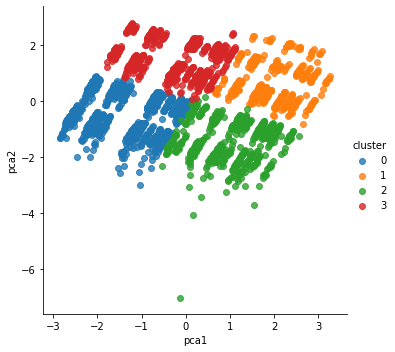

In [95]:
# Extraemos las componentes
km_data = km_data.withColumn("pca1", p1("pca_scaled_features")).withColumn("pca2", p2("pca_scaled_features"))

pdf6 = km_data.sample(False, 0.1, 0).select("pca1", "pca2", "cluster").toPandas()
pdf6

sb.lmplot(x="pca1", y="pca2", hue="cluster", fit_reg=False, data=pdf6)